In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
folder_input_path = '/content/drive/My Drive/Colab Notebooks/4_Influencing_Signal/data-hrv-kaggle/'
img_path = '/content/drive/My Drive/Colab Notebooks/4_Influencing_Signal/plots/'

In [36]:
import pandas as pd
df = pd.read_csv(folder_input_path + '/test.csv')

In [37]:
# Mapping for condition to stress_name
stress_name_map = {
    'interruption': 'stress',
    'time pressure': 'stress',
    'no stress': 'no stress',
}

# Assign stress_name based on condition
df['stress_name'] = df['condition'].map(stress_name_map)

In [27]:
df[:100]

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition,stress_name
0,721.901897,727.267280,74.722315,12.361264,12.361069,6.044877,84.121868,4.933333,0.000000,8.743513,...,3.921868,9.760289,1698.605390,9.245599,0.108160,2.097342,1.243696,2,no stress,no stress
1,843.538633,844.407930,58.499429,19.298880,19.298795,3.031234,71.478642,21.000000,0.200000,13.650863,...,1.123416,1.663151,2358.884694,59.126832,0.016913,2.217275,1.250056,2,time pressure,stress
2,958.523868,966.671125,132.849110,21.342715,21.342653,6.224565,63.874293,24.133333,1.800000,15.096571,...,0.370208,0.766416,4328.633724,129.477524,0.007723,2.217136,1.144943,2,no stress,no stress
3,824.838669,842.485905,117.822094,11.771814,11.771248,10.008830,74.330531,4.733333,0.533333,8.326307,...,0.615932,3.358652,2854.449091,28.773854,0.034754,2.106863,1.142355,2,no stress,no stress
4,756.707933,747.941620,143.968457,13.357748,13.356388,10.777899,82.092049,5.933333,0.666667,9.447545,...,0.662879,6.292253,5310.027472,14.892559,0.067148,1.912191,1.128098,2,interruption,stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1034.939196,1045.743650,126.036763,17.354428,17.353602,7.262513,58.920857,14.666667,0.800000,12.274945,...,0.146129,0.626327,4530.633734,158.661027,0.006303,2.147592,1.134913,2,interruption,stress
96,883.331421,888.468910,63.678021,11.918537,11.918440,5.342771,68.285982,4.600000,0.000000,8.430422,...,0.199250,0.763903,2283.551086,129.906712,0.007698,2.188145,1.082047,2,no stress,no stress
97,884.119538,895.598410,101.996218,14.077156,14.077080,7.245513,68.831935,8.533333,0.000000,9.957320,...,0.471325,2.197658,3546.574934,44.502983,0.022470,2.156776,1.165071,2,no stress,no stress
98,762.024466,766.941745,57.922564,9.547562,9.547561,6.066739,79.205373,0.800000,0.000000,6.753398,...,1.341239,4.441365,1464.226269,21.515599,0.046478,2.173662,1.154987,2,interruption,stress


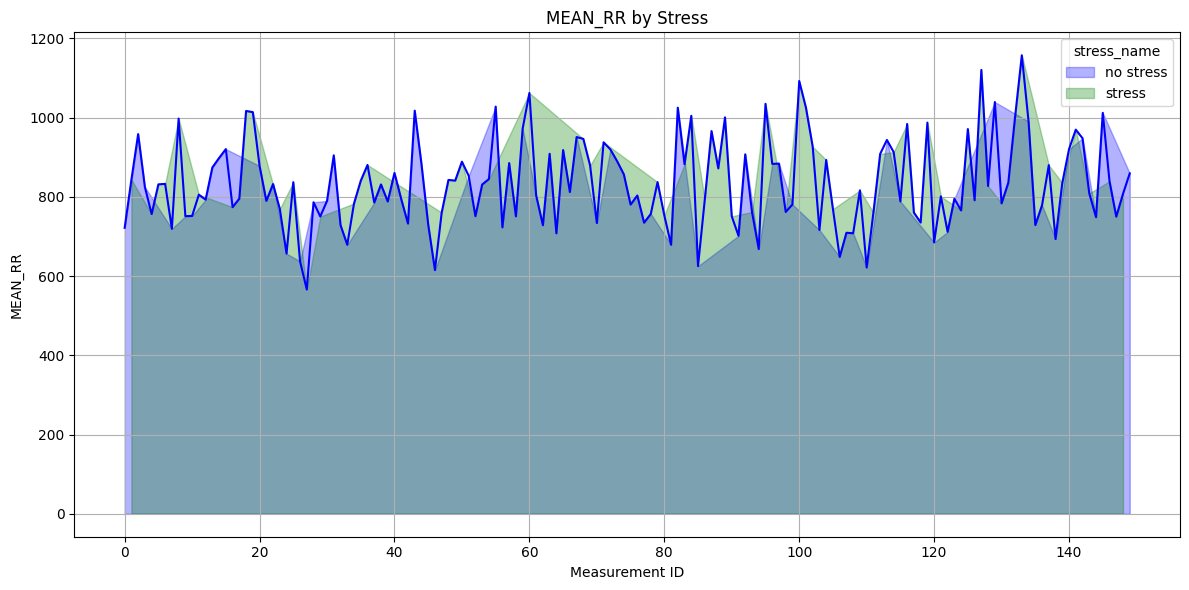

In [29]:
import matplotlib.pyplot as plt

df = df[:150]

# Unique conditions in the dataset
conditions = df['stress_name'].unique()

# Colors for the conditions - assuming a limited number of conditions, we choose a set of distinct colors
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
color_map = dict(zip(conditions, colors[:len(conditions)]))

plt.figure(figsize=(12, 6))

# Plotting each condition with a different color
for condition, group_df in df.groupby('stress_name'):
    plt.fill_between(group_df.index, group_df['MEAN_RR'], label=condition, color=color_map[condition], alpha=0.3)
plt.plot(df.index, df['MEAN_RR'], color='blue') # marker='o', linestyle='-', markersize=1,
plt.title('MEAN_RR by Stress')
plt.xlabel('Measurement ID')
plt.ylabel('MEAN_RR')
plt.legend(title='stress_name')
plt.tight_layout()
plt.grid()

plt.show()

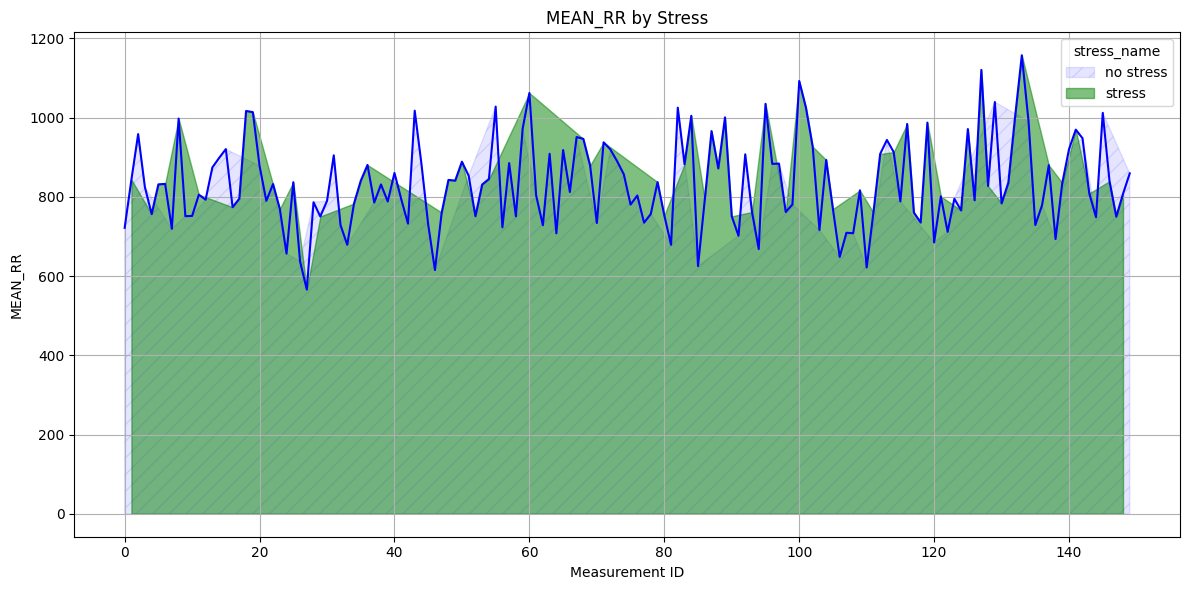

In [30]:
import matplotlib.pyplot as plt

df = df[:150]

# Unique conditions in the dataset
conditions = df['stress_name'].unique()

# Colors for the conditions
colors = ['blue', 'green']
color_map = dict(zip(conditions, colors[:len(conditions)]))

plt.figure(figsize=(12, 6))

# Plotting each condition with a different color and hatch
for condition, group_df in df.groupby('stress_name'):
    if condition == 'stress':
        plt.fill_between(group_df.index, group_df['MEAN_RR'], label=condition, color=color_map[condition], alpha=0.5)
    else:
        plt.fill_between(group_df.index, group_df['MEAN_RR'], label=condition, color=color_map[condition], alpha=0.1, hatch='//')

# Plot the line for HR
plt.plot(df.index, df['MEAN_RR'], color='blue')

plt.title('MEAN_RR by Stress')
plt.xlabel('Measurement ID')
plt.ylabel('MEAN_RR')
plt.legend(title='stress_name')
plt.tight_layout()
plt.grid()

plt.show()


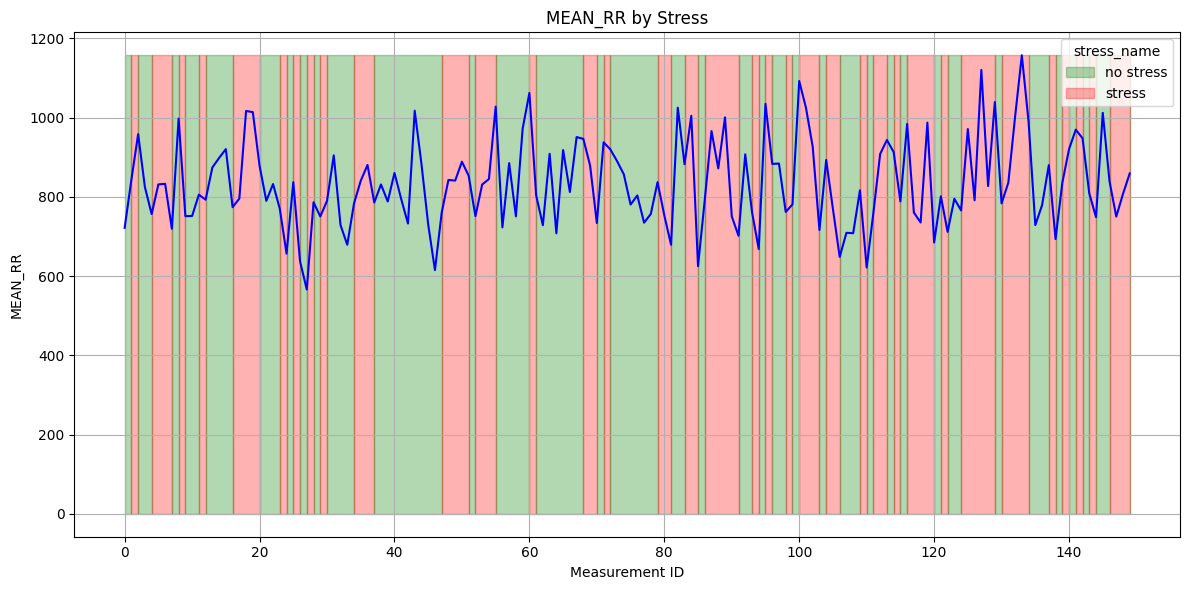

In [32]:
import matplotlib.pyplot as plt
import matplotlib.patches as pat

df = df[:150]

# Define a color for each condition
color_map = {
    'no stress': 'green',  # Green for no stress periods
    'stress': 'red'       # Red for stress periods
}

plt.figure(figsize=(12, 6))

prev_condition = None
start_index = 0

# Iterate through the dataframe and apply fill_between for blocks of conditions
for index, row in df.iterrows():
    condition = row['stress_name']

    # Check if the condition has changed since the last measurement
    if condition != prev_condition and prev_condition is not None:
        plt.fill_betweenx(y=[0, max(df['MEAN_RR'])], x1=start_index, x2=index, color=color_map[prev_condition], alpha=0.3)
        start_index = index  # Reset the start index for the new block

    prev_condition = condition

# Fill the last block if the loop ends before the condition changes again
plt.fill_betweenx(y=[0, max(df['MEAN_RR'])], x1=start_index, x2=df.index[-1], color=color_map[prev_condition], alpha=0.3)

# Plot the line for MEAN_RR
plt.plot(df.index, df['MEAN_RR'], color='blue')

plt.title('MEAN_RR by Stress')
plt.xlabel('Measurement ID')
plt.ylabel('MEAN_RR')
plt.legend(title='stress_name', handles=[pat.Patch(color=color_map['no stress'], label='no stress', alpha=0.3),
                                        pat.Patch(color=color_map['stress'], label='stress', alpha=0.3)])
plt.tight_layout()
plt.grid()

plt.show()


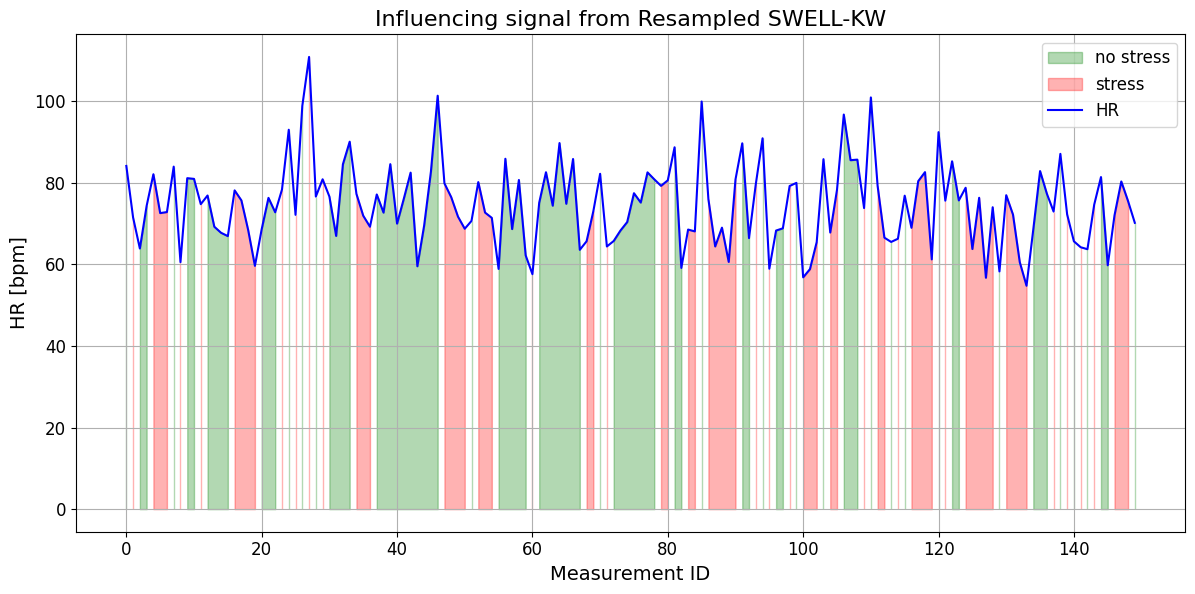

In [42]:
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import matplotlib.lines as lin

df = df[:150]

# Define a color for each condition
color_map = {
    'no stress': 'green',  # Green for no stress periods
    'stress': 'red'        # Red for stress periods
}

plt.figure(figsize=(12, 6))

prev_condition = df.iloc[0]['stress_name']
start_index = df.index[0]

# Plot the line for HR
plt.plot(df.index, df['HR'], color='blue', label='HR')

# Iterate through the dataframe and apply fill_between for blocks of conditions
for index, row in df.iterrows():
    condition = row['stress_name']

    # Check if the condition has changed since the last measurement
    if condition != prev_condition:
        end_index = index
        plt.fill_between(x=df[start_index:end_index].index,
                         y1=df[start_index:end_index]['HR'],
                         color=color_map[prev_condition],
                         alpha=0.3)
        start_index = index  # Reset the start index for the new block

    prev_condition = condition

# Fill the last block if the loop ends before the condition changes again
plt.fill_between(x=df[start_index:].index,
                 y1=df[start_index:]['HR'],
                 color=color_map[prev_condition],
                 alpha=0.3)

plt.title('Influencing signal from Resampled SWELL-KW', fontsize=16)
plt.xlabel('Measurement ID', fontsize=14)
plt.ylabel('HR [bpm]', fontsize=14)
plt.legend(handles=[pat.Patch(color=color_map['no stress'], label='no stress', alpha=0.3),
                    pat.Patch(color=color_map['stress'], label='stress', alpha=0.3),
                    lin.Line2D([], [], color='blue', label='HR')], fontsize=12)
plt.tight_layout()
plt.grid()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig(img_path + 'resampled_swell_influencing_signal.png', dpi=300, bbox_inches='tight')
plt.show()


In [26]:
df[['HR','condition','stress_name']][:100]

,HR,condition,stress_name
0,84.121868,no stress,no stress
1,71.478642,time pressure,stress
2,63.874293,no stress,no stress
3,74.330531,no stress,no stress
4,82.092049,interruption,stress
...,...,...,...
95,58.920857,interruption,stress
96,68.285982,no stress,no stress
97,68.831935,no stress,no stress
98,79.205373,interruption,stress
